# Even / Odd training empiar10311
N2N (Noise2Noise) denoising del volumen empiar11415. Utiliza 2 volúmenes $V_1$ y $V_2$, donde $V_1$ es el volumen formado por los slices Z pares "even" y $V_2$ es el volumen formado por los slices Z impares "odd".

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/empiar10311`.

In [1]:
# %pip install tensorflow==2.4

## Creamos $V_1$ y $V_2$

In [2]:
%run split_even_odd.ipynb

noisy.shape=(100, 1024, 1024)
Writing /nas/vruiz/cryoCARE/empiar10311/even.mrc
even.shape=(54, 1024, 1024)
Writing /nas/vruiz/cryoCARE/empiar10311/odd.mrc
odd.shape=(54, 1024, 1024)


## Configuramos cryoCARE

In [3]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/train_data_config__evenodd.json
{
    "even": ["even.mrc"],
    "odd": ["odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 360,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./even_odd_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/empiar10311/train_data_config__evenodd.json


In [4]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__evenodd.json

2025-10-27 22:27:52.802554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(54, 1024, 1024), sample_shape=[16, 16, 16]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 6023.44it/s]


## Entrenamos

In [5]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/train_config__evenodd.json
{
  "train_data": "./even_odd_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/empiar10311/train_config__evenodd.json


In [7]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__evenodd.json

2025-10-27 22:35:48.553473: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-27 22:35:53.802493: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-27 22:35:53.803289: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-27 22:35:53.822232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-27 22:35:53.823649: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-27 22:35:53.823725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 16
2 16
3 16
4 1
Epoch 1/50


2025-10-27 22:35:57.749069: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-27 22:35:59.335452: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-27 22:35:59.412605: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-27 22:36:00.426763: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-27 22:36:00.840954: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-27 22:36:32.786055: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 55s 101ms/step - loss: 0.7132 - mse: 0.7132 - mae: 0.6636 - val_loss: 0.6384 - val_mse: 0.6384 - val_mae: 0.6363
Epoch 2/50
200/200 [==============================] - 3s 13ms/step - loss: 0.5637 - mse: 0.5637 - mae: 0.5951 - val_loss: 0.6237 - val_mse: 0.6237 - val_mae: 0.6327
Epoch 3/50
200/200 [==============================] - 3s 14ms/step - loss: 0.5518 - mse: 0.5518 - mae: 0.5894 - val_loss: 0.6172 - val_mse: 0.6172 - val_mae: 0.6282
Epoch 4/50
200/200 [==============================] - 3s 13ms/step - loss: 0.5449 - mse: 0.5449 - mae: 0.5856 - val_loss: 0.6100 - val_mse: 0.6100 - val_mae: 0.6249
Epoch 5/50
200/200 [==============================] - 3s 13ms/step - loss: 0.5453 - mse: 0.5453 - mae: 0.5861 - val_loss: 0.6107 - val_mse: 0.6107 - val_mae: 0.6268
Epoch 6/50
200/200 [==============================] - 3s 13ms/step - loss: 0.5445 - mse: 0.5445 - mae: 0.5855 - val_loss: 0.6136 - val_mse: 0.6136 - val_mae: 0.6288
Epoch 7/50
200/200 

/home/jupyter-vruiz/envs/cryoCARE/lib/python3.8/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /nas/vruiz/cryoCARE/empiar10311/model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))



Loading network weights from 'weights_best.h5'.


## Inferimos

In [8]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/predict_config__evenodd.json
{
    "path": "./model.tar.gz",
    "even": ["empiar10311_stack_crop.mrc"], 
    "odd": ["empiar10311_stack_crop.mrc"],
    "n_tiles": [1,1,1],
    "output": "even_odd_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/empiar10311/predict_config__evenodd.json


In [9]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__evenodd.json || true

/nas/vruiz/cryoCARE/empiar10311


2025-10-27 22:39:09.386670: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-27 22:39:14.937891: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-27 22:39:14.938867: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-27 22:39:14.960673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-27 22:39:14.962129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-27 22:39:14.962208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(104, 1024, 1024, 1)
Out of memory, retrying with n_tiles = (1, 1, 2, 1)


100%|██████████| 2/2 [00:05<00:00,  2.77s/it]    


['NEWSTACK: Images copied                                  6-May-22  11:43:36     '
 'NEWSTACK: Images copied                                  6-May-22  11:46:44     '
 '' '' '' '' '' ''
 'cryoCARE                                                27-Oct-25  22:40:20     '
 '']


In [10]:
import mrcfile
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [11]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [12]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar10311/empiar10311_stack_crop.mrc'
original_volume = read_MRC(mrc_file_path)

In [13]:
original_volume.shape

(100, 1024, 1024)

In [14]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar10311/even_odd_denoised/empiar10311_stack_crop.mrc'
denoised_volume = read_MRC(mrc_file_path)

In [15]:
denoised_volume.shape

(100, 1024, 1024)

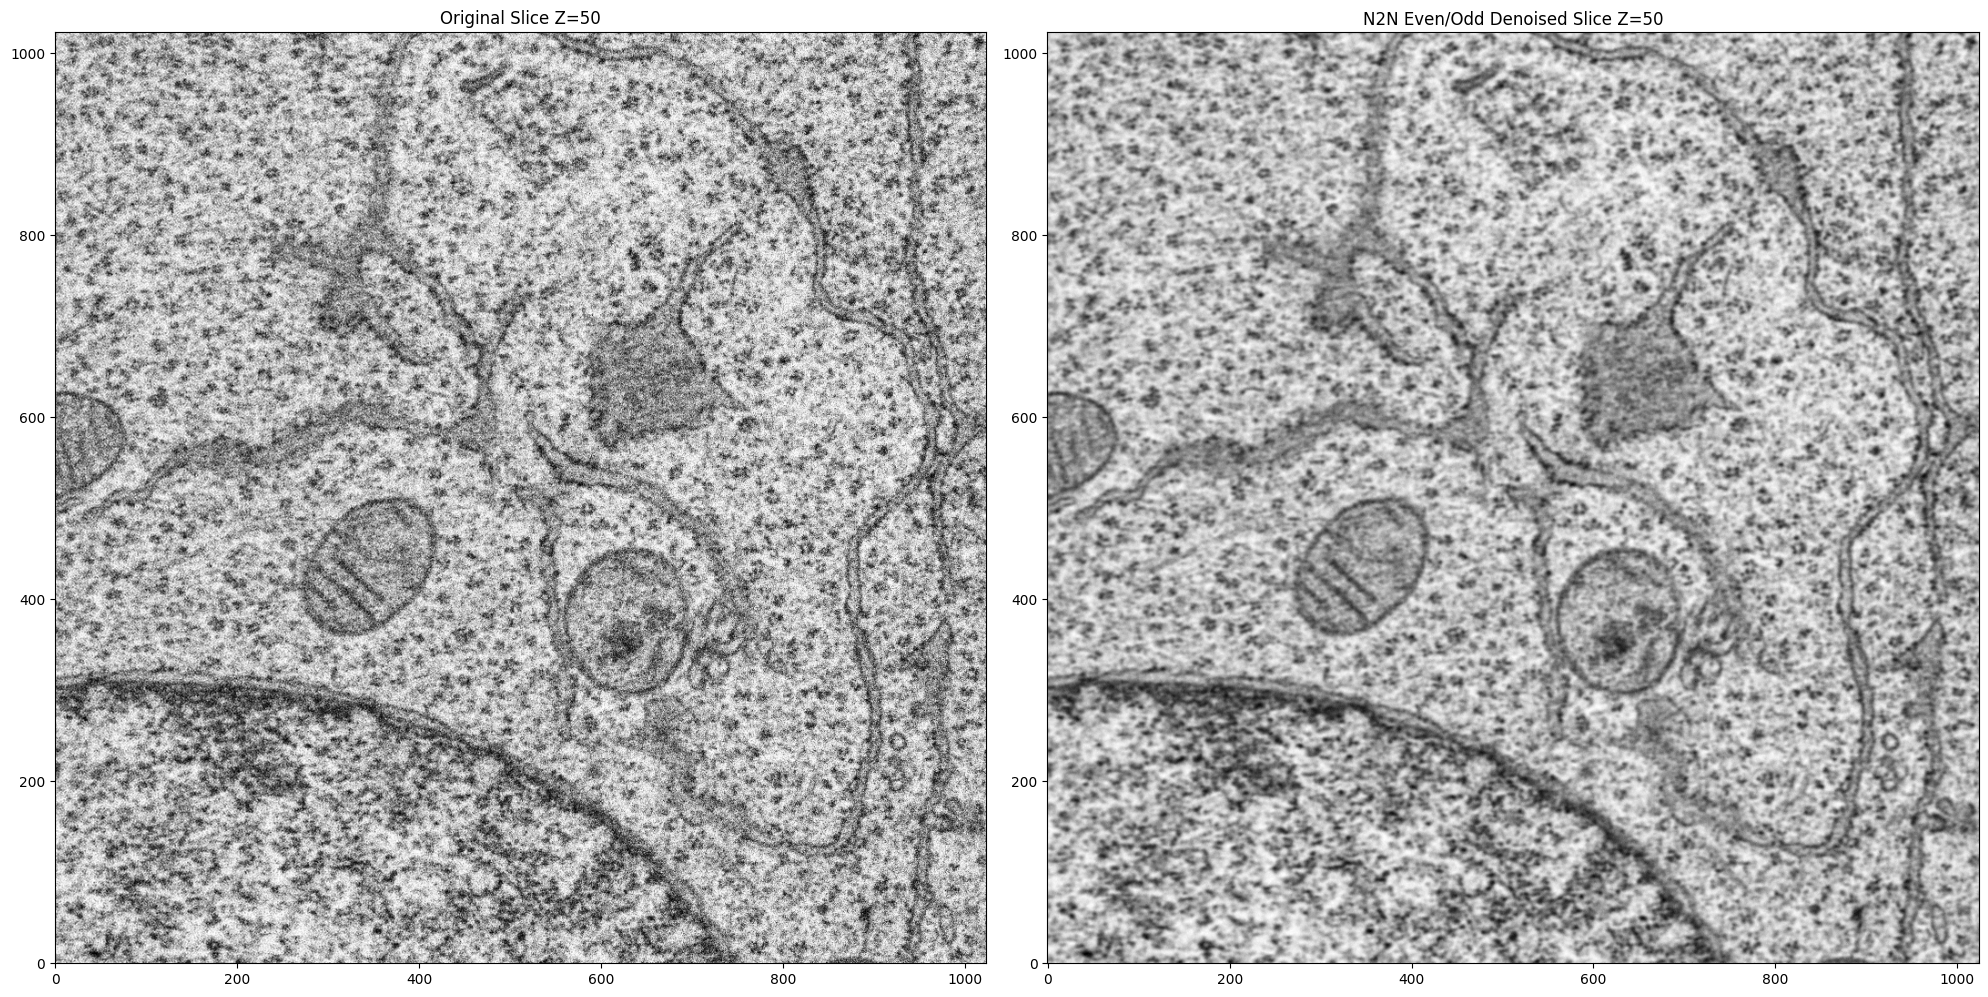

In [16]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Even/Odd Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

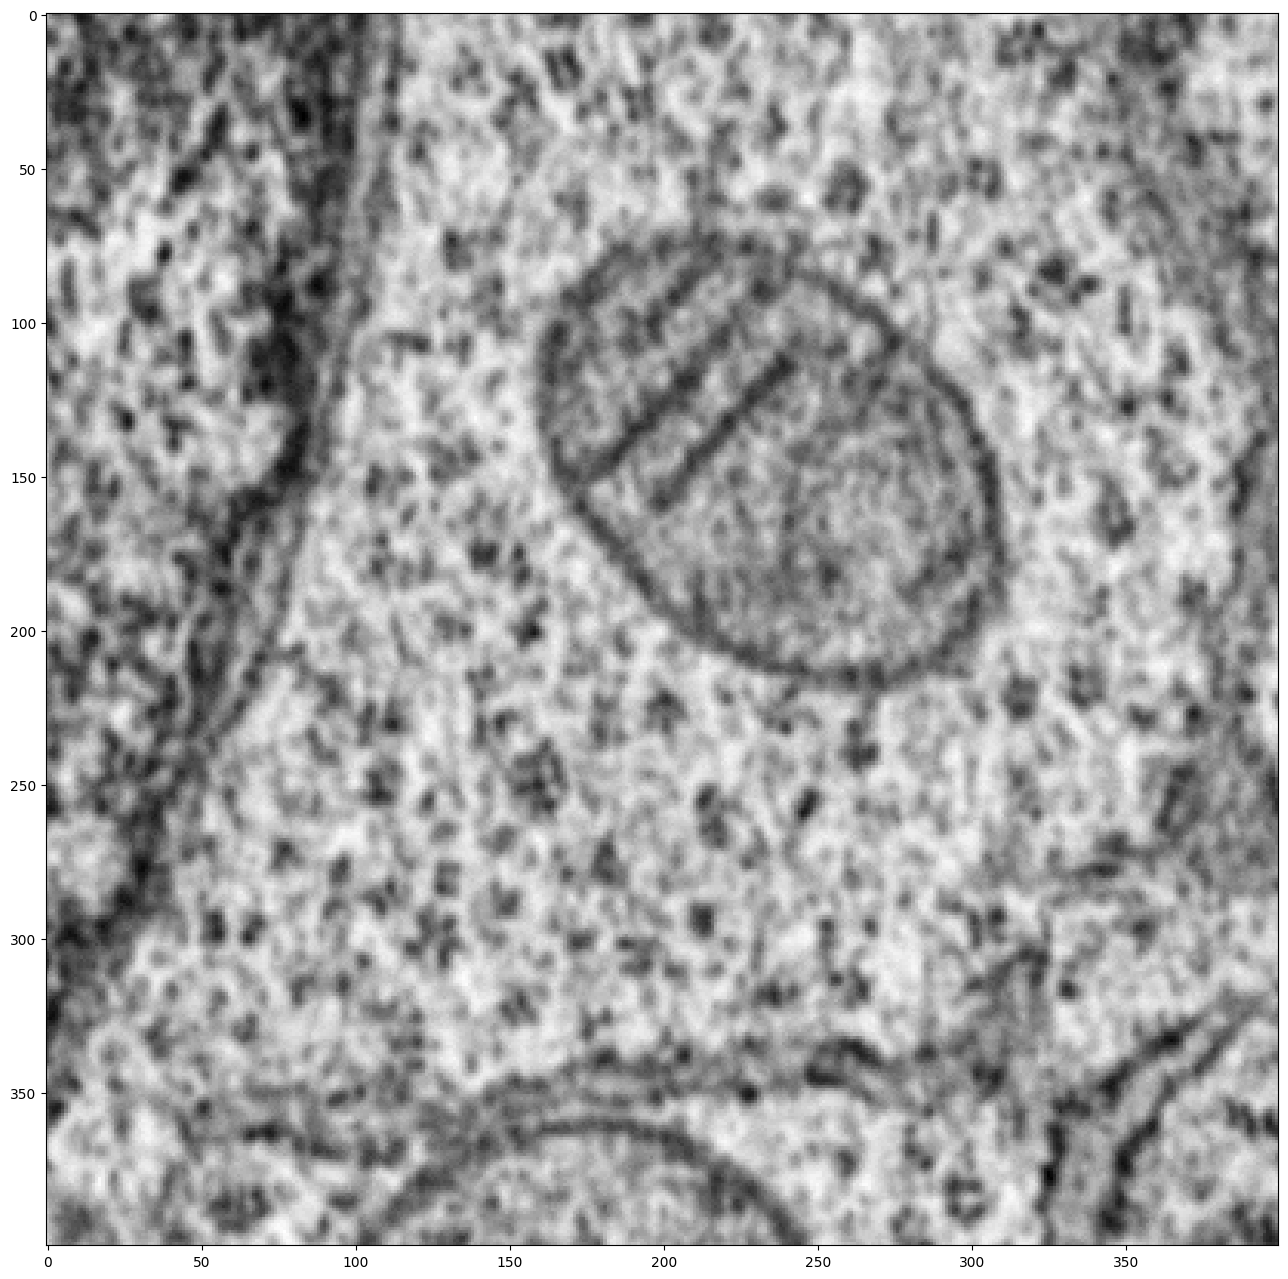

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(16, 16))
slice_idx = denoised_volume.shape[0]//2
plt.imshow(denoised_volume[slice_idx, 200:600, 200:600], cmap="gray")

In [17]:
%pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

  Cloning https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to /tmp/pip-install-fhcqzjem/self-fourier-shell-correlation_6c924f9e50cc48c0830bb7a995e63c30
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation /tmp/pip-install-fhcqzjem/self-fourier-shell-correlation_6c924f9e50cc48c0830bb7a995e63c30
  Resolved https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to commit f785ed2aa883d5362036cc66d26498286c9a48ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [18]:
%pip show self_fourier_shell_correlation

Name: self_fourier_shell_correlation
Version: 0.0.1
Summary: Self Fourier shell correlation (https://www.nature.com/articles/s42003-023-05724-y)
Home-page: https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation
Author: 
Author-email: "Eric J. Verbeke" <ev9102@princeton.edu>, Vicente González Ruiz <vicente.gonzalez.ruiz@gmail.com>
License: 
Location: /nas/vruiz/envs/cryoCARE/lib/python3.8/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
print(sys.executable)

In [ ]:
%pip install "shuffling @ git+https://github.com/vicente-gonzalez-ruiz/shuffling"

In [ ]:
%pip install opencv-python

In [ ]:
%pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"

In [ ]:
from self_fourier_shell_correlation import fsc_utils as fsc

In [ ]:
import mrcfile

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
even = mrcfile.read("/nas/vruiz/cryoCARE/empiar10311/even.mrc")

In [ ]:
odd = mrcfile.read("/nas/vruiz/cryoCARE/empiar10311/odd.mrc")

In [ ]:
spatial_freq, fsc_values = fsc.fourier_shell_correlation(even, odd, shell_thickness=0.01)

In [ ]:
fsc.plot_fsc(spatial_freq, fsc_values, "Spatial Frequency (1/voxel units)", "FSC", "FSC(even, odd)")

In [ ]:
figure(figsize=(16, 16))
slice_idx = denoised.shape[0]//2
plt.imshow(denoised[slice_idx, 200:600, 200:600], cmap="gray")